<a href="https://colab.research.google.com/github/SyedOmarAli/HelmetDetectionForRiderSafety/blob/main/HelmetDetectionForRiderSafety.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import os

In [2]:
zip_path = "/content/helmet-no-helmet.v1i.yolov11.zip"
extract_path = "/content/helmet-no-helmet_dataset"

In [5]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [6]:
os.listdir(extract_path)

['train',
 'valid',
 'README.dataset.txt',
 'data.yaml',
 'README.roboflow.txt',
 'test']

In [7]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.6 MB/s eta 0:00:00


In [8]:
from ultralytics import YOLO

In [9]:
model = YOLO("yolov8n.pt")

In [10]:
!pwd

/content


In [11]:
!find /content -name data.yaml

/content/helmet-no-helmet_dataset/data.yaml


In [12]:
model.train(
    data="/content/helmet-no-helmet_dataset/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16
)

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/helmet-no-helmet_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plo

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7df9b20494c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [13]:
!ls runs/detect/train/weights

best.pt  last.pt


In [14]:
!ls runs/detect

train


In [15]:
!ls runs/detect/*/weights

best.pt  last.pt


In [16]:
model = YOLO("runs/detect/train/weights/best.pt")

In [17]:
results = model.predict(
    source="/content/helmet-no-helmet_dataset/valid/images",
    save=True,
    conf=0.5
)


image 1/149 /content/helmet-no-helmet_dataset/valid/images/hard_hat_workers2007_png.rf.346d6d4df051b1140206963e1eb9d819.jpg: 640x640 3 helmets, 8.4ms
image 2/149 /content/helmet-no-helmet_dataset/valid/images/hard_hat_workers2008_png.rf.5e6bf430ef69654cc42caa0820f0def9.jpg: 640x640 2 helmets, 19.8ms
image 3/149 /content/helmet-no-helmet_dataset/valid/images/hard_hat_workers2009_png.rf.f44e0008985d9992d22df7188857690a.jpg: 640x640 1 helmet, 11.0ms
image 4/149 /content/helmet-no-helmet_dataset/valid/images/hard_hat_workers2010_png.rf.fa11153fdc3a3502b86e89d43b115bc7.jpg: 640x640 3 helmets, 10.6ms
image 5/149 /content/helmet-no-helmet_dataset/valid/images/hard_hat_workers2011_png.rf.72e890c6747802fd57bee375743f5b14.jpg: 640x640 4 helmets, 13.2ms
image 6/149 /content/helmet-no-helmet_dataset/valid/images/hard_hat_workers2012_png.rf.be5423d175c2a4adb62f5fd67ad4c1ce.jpg: 640x640 2 helmets, 12.2ms
image 7/149 /content/helmet-no-helmet_dataset/valid/images/hard_hat_workers2013_png.rf.3336ccc3

In [18]:
from IPython.display import Image, display
import glob

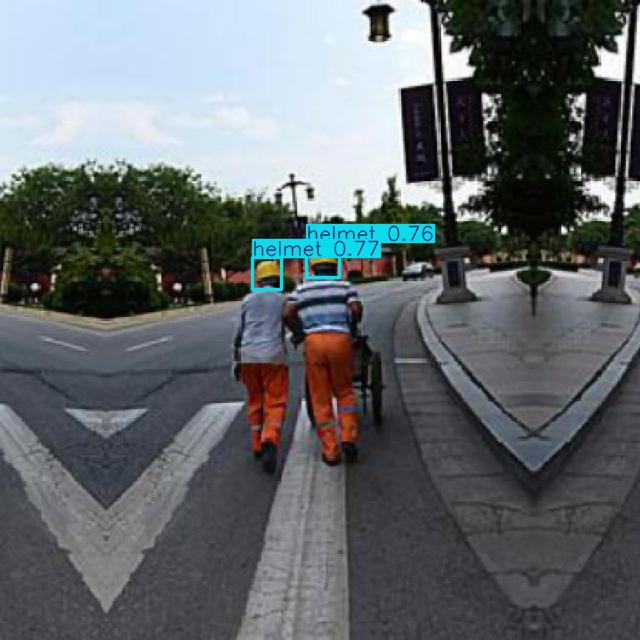

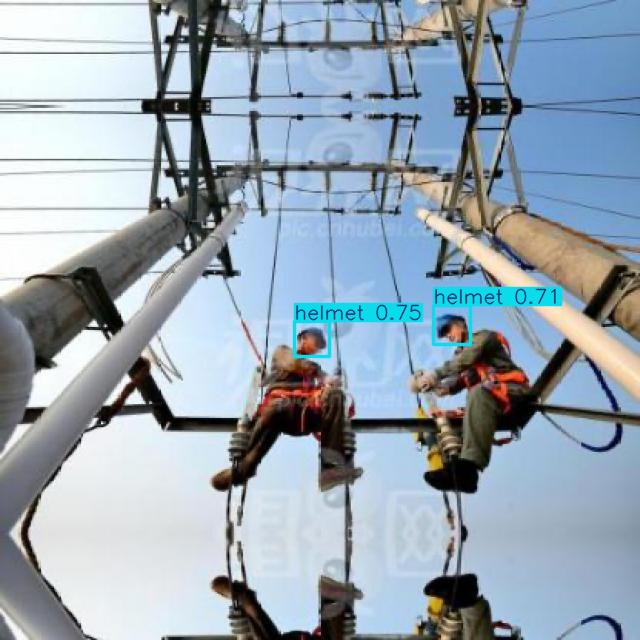

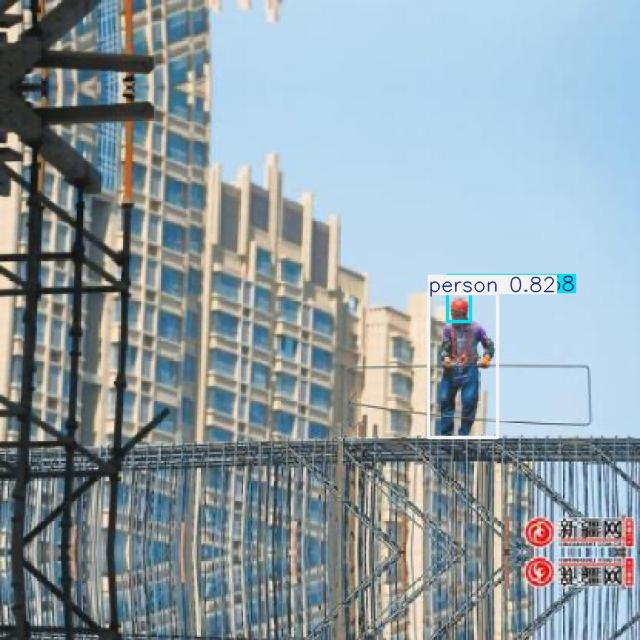

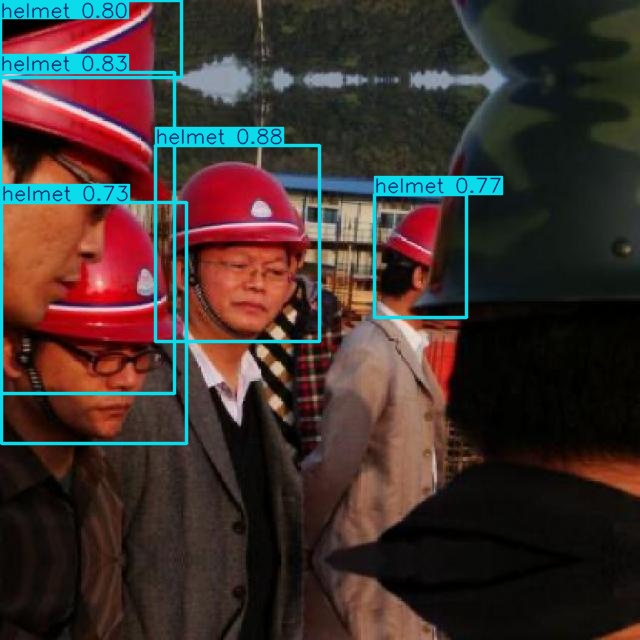

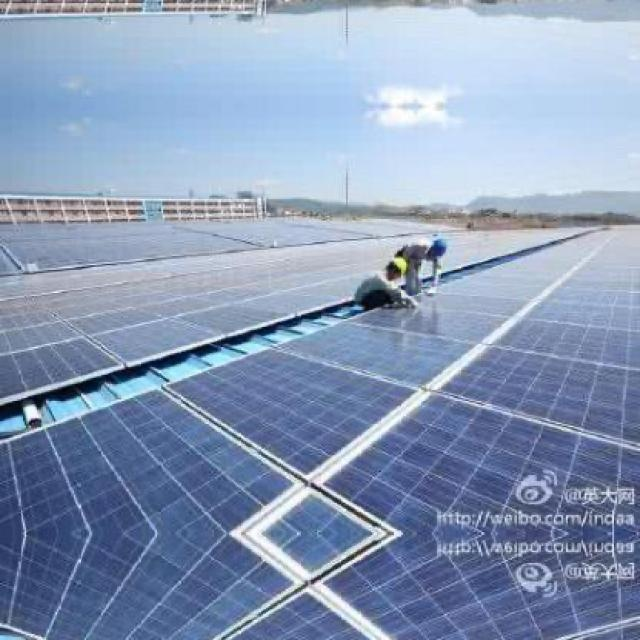

In [19]:
for img in glob.glob("runs/detect/predict/*.jpg")[:5]:
    display(Image(filename=img))

In [20]:
!pip install gradio

In [21]:
model = YOLO("runs/detect/train/weights/best.pt")

In [22]:
import cv2
import numpy as np

In [23]:
def detect_objects(image):
    # YOLO prediction
    results = model.predict(image, conf=0.5)

    # Bounding boxes drawn
    annotated_image = results[0].plot()

    # BGR → RGB (for Gradio)
    annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

    return annotated_image

In [24]:
import gradio as gr

In [28]:
interface = gr.Interface(
    fn=detect_objects,
    inputs=gr.Image(type="numpy", label="Upload Image"),
    outputs=gr.Image(type="numpy", label="Detected Output"),
    title="Helmet Detection System",
    description="YOLO-based Object Detection using Deep Learning",
)

In [ ]:
interface.launch(debug=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://cef32ad088dce3f76e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/protocols/http/h11_impl.py", line 403, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/middleware/proxy_headers.py", line 60, in __call__
    return await self.app(scope, receive, send)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/fastapi/applications.py", line 1139, in __call__
    await super().__call__(scope, receive, send)
  File "/usr/local/lib/python3.12/dist-packages/starlette/applications.py", line 107, in __call__
    await self.middleware_stack(scope, receive, send)
  File "/usr/local/lib/python3.12/dist-packages/starlette/middleware/errors.py", line 186, in __call__
    raise exc
  File "/usr/local/lib/python3.12/dist-packages/starlette/middleware/errors.py",


0: 640x512 (no detections), 44.3ms
Speed: 4.1ms preprocess, 44.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 512)


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/protocols/http/h11_impl.py", line 403, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/middleware/proxy_headers.py", line 60, in __call__
    return await self.app(scope, receive, send)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/fastapi/applications.py", line 1139, in __call__
    await super().__call__(scope, receive, send)
  File "/usr/local/lib/python3.12/dist-packages/starlette/applications.py", line 107, in __call__
    await self.middleware_stack(scope, receive, send)
  File "/usr/local/lib/python3.12/dist-packages/starlette/middleware/errors.py", line 186, in __call__
    raise exc
  File "/usr/local/lib/python3.12/dist-packages/starlette/middleware/errors.py",


0: 640x640 3 helmets, 42.1ms
Speed: 3.3ms preprocess, 42.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
